# The minimum example code to run `SingleCellArchetype`
- To start **↓↓↓**  
- [![Open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FangmingXie/SingleCellArchetype/blob/main/sca/tutorial_minimum.ipynb)
- Expected time: ~ 1 min.

**Alternatively, you can also check out [this](https://github.com/FangmingXie/SingleCellArchetype/blob/main/sca/tutorial_complete.ipynb) complete tutorial**.

## 1. set up the computing environment

In [1]:
# installing prerequisite packages (only if in Google Colab)
try:
    import google.colab
    print("Running in Google Colab")
    print("Installing prerequisite packages... (expected time < 1 min)")
    
    !pip install anndata
    !pip install py_pcha
    !wget https://raw.githubusercontent.com/FangmingXie/SingleCellArchetype/refs/heads/main/sca/sca.py
    !wget https://raw.githubusercontent.com/FangmingXie/SingleCellArchetype/refs/heads/main/sca/utils.py
    
except ImportError:
    print("Not running in Google Colab")
    print("Skip installing prerequisite packages.")

Not running in Google Colab
Skip installing prerequisite packages.


In [2]:
# import packages  
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

import anndata as ad

from sca import SingleCellArchetype
from utils import plot_archetype

In [3]:
# load sample data
file_name = 'data_snrna_v1.h5ad'
if not os.path.isfile(file_name):
    !wget 'https://raw.githubusercontent.com/FangmingXie/SingleCellArchetype/main/data/data_snrna_v1.h5ad'
    
adata = ad.read_h5ad(file_name)
adata

AnnData object with n_obs × n_vars = 4044 × 286
    obs: 'Class_broad', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'Type', 'Subclass', 'cond'
    layers: 'lognorm', 'norm'

## 2. set up the `SingleCellArchetype` object
Using three pieces of information from the sample data
- `x`: the cell-by-gene count matrix (in dense format)
- `depths`: sequencing depth for each cell (total mRNA counts per cell; for normalization purpose)
- `types`: cell type label for each cell (for visualization purpose - and later on for statistical shuffling)


In [4]:
x = np.array(adata.X.todense())
depths = adata.obs['n_counts'].values
types = adata.obs['Type'].values

sca = SingleCellArchetype(x, depths, types)

## 3. Infer archetypes

In [5]:
ndim = 2
noc = 3
xp, aa = sca.proj_and_pcha(ndim, noc)

## 4. plot results

In [6]:
types_colorvec = np.char.add('C', sca.types_idx.astype(str))

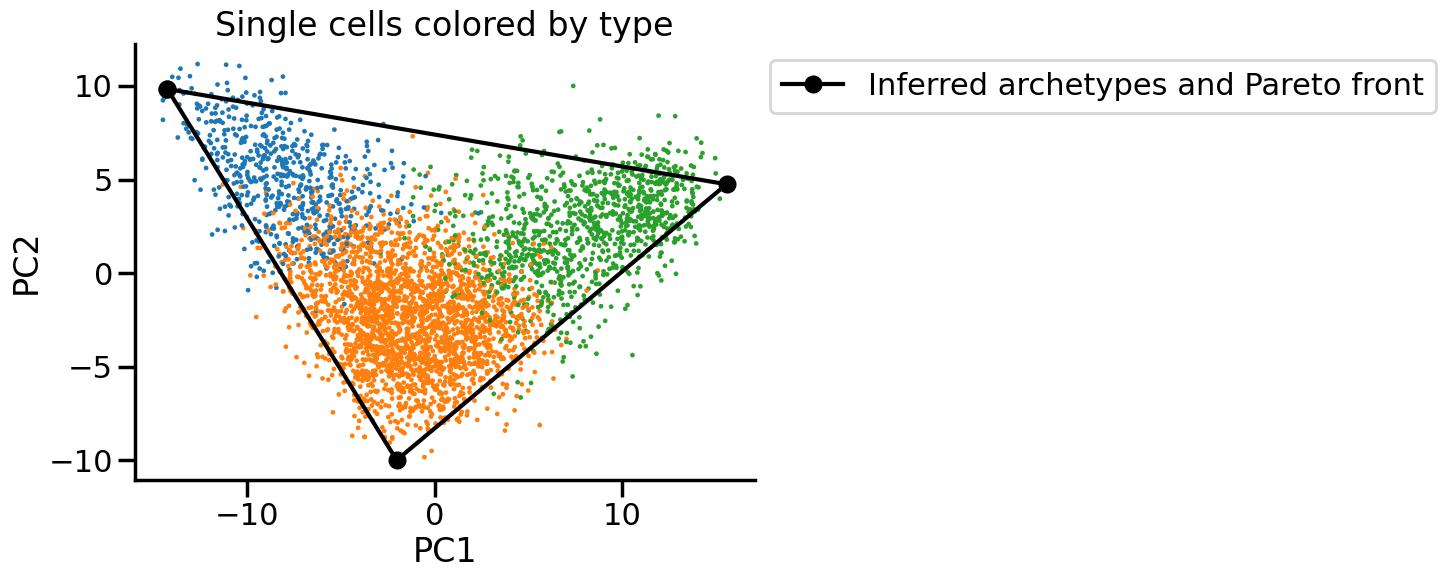

In [7]:
# plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(xp[:,0], xp[:,1], c=types_colorvec, s=2)
plot_archetype(ax, aa, fmt='-o', color='k', 
               label='Inferred archetypes and Pareto front')
ax.set_title('Single cells colored by type')
ax.legend(bbox_to_anchor=(1,1))
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_aspect('equal')
sns.despine(ax=ax)
ax.grid(False)
    
plt.show()